# Análisis y visualización de datos con Python
# 8. Graficación y visualización de datos

    - a) Pandas plot
    - b) Opciones de figura
    - c) Distribución
    - d) Gráficos múltiples 
    - e) Heatmaps y clustermaps
    - f) Normalización
    - g) Resumen

---

Para la parte teórica de este tutorial vean la presentación de [Teoría de la
Visualización de datos](./extras/VisualizaciónDatos.pdf)


`Matplotlib` y `Seaborn` son bibliotecas de visualización de datos muy populares en Python. `Matplotlib` se utiliza para crear visualizaciones básicas y personalizadas, mientras que `Seaborn` se enfoca en visualizaciones estadísticas más avanzadas. Ambas bibliotecas son altamente configurables y permiten la creación de gráficos impresionantes con poco esfuerzo. También es posible crear visualizaciones interactivas utilizando bibliotecas adicionales como `Bokeh` y `Plotly`.

En primer lugar, es necesario cargar los datos. Usaremos el archivo en formato `pickle` que ya incluye las configuraciones de tipos de datos y categorías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

in_file = "data_clean/HBO_clean.pkl"
with open(in_file, 'rb') as f:
     df = load(f)
df.tail()


,ID,Nombre_completo_transcrito,Primer_apellido,Segundo_apellido,Nombres_propios,Fecha_transcrito,Fecha_estandar,Fecha_año,Fecha_mes,Fecha_diasemana,...,Diagnostico_transcrito,Diagnostico_estandar,Diagnostico_extendido,Diagnostico_clasificacion,Sexo,Edad_transcrito,Edad_estandar,Edad_grupo,Tipo_restos,Conocido_desconocido
96839,BO_1982_07489,placenta,NaN,NaN,NaN,1982-06-05,1982-06-05,1982.0,6.0,Sábado,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96840,BO_1982_07490,5 dedos del pie derecho de desconocido,NaN,NaN,NaN,1982-06-05,1982-06-05,1982.0,6.0,Sábado,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96841,BO_1982_07491,dedo de desconocido,NaN,NaN,NaN,1982-11-19,1982-11-19,1982.0,11.0,Viernes,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96842,BO_1982_07492,4 dedos de desconocido,NaN,NaN,NaN,1982-11-28,1982-11-28,1982.0,11.0,Domingo,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Miembros u óseos,Desconocido
96843,BO_1982_07493,osamenta de desconocido,NaN,NaN,NaN,1982-10-11,1982-10-11,1982.0,10.0,Lunes,...,S-D,NaN,NaN,NaN,S-D,S-D,NaN,NaN,Cadáver,Desconocido


Revisemos los tipos de datos

In [2]:
df.dtypes

ID                                    object
Nombre_completo_transcrito            object
Primer_apellido                       object
Segundo_apellido                      object
Nombres_propios                       object
Fecha_transcrito                      object
Fecha_estandar                datetime64[ns]
Fecha_año                           category
Fecha_mes                           category
Fecha_diasemana                     category
Procedencia_transcrito                object
Procedencia_estandar                category
Procedencia_extendido                 object
Procedencia_alcaldia                category
Diagnostico_transcrito                object
Diagnostico_estandar                category
Diagnostico_extendido                 object
Diagnostico_clasificacion           category
Sexo                                category
Edad_transcrito                       object
Edad_estandar                        float64
Edad_grupo                          category
Tipo_resto

## 8.a Pandas plot

El comando `.plot()` de Pandas es una función que permite crear visualizaciones de datos a partir de un DataFrame o Series de Pandas. El método `.plot()` utiliza Matplotlib como motor de visualización y ofrece una interfaz simplificada para crear gráficos a partir de datos.

Algunos de los tipos de gráficos que se pueden crear con `plot()` incluyen:
* Gráficos de línea `(kind='line')`: traza puntos de datos conectados por una línea.
* Gráficos de dispersión `(kind='scatter')`: traza puntos de datos en un espacio bidimensional para mostrar la relación entre dos variables.
* Gráficos de barras `(kind='bar')`: traza barras horizontales o verticales para mostrar la cantidad de valores en cada categoría. Es posible configurar que sean horizontales `(kind='barh')` y/o apiladas `(stacked=True)`.
* Gráficos de áreas `(kind='area')`: traza una línea que muestra la evolución de una variable y el área debajo de la línea se rellena con un color sólido.
* Gráficos de histogramas `(kind='hist')`: traza un histograma que muestra la distribución de los valores en un conjunto de datos continuos. Los valores se agrupan en "bins" y se cuenta la cantidad de valores que caen en cada bin.
* Gráficos de densidad de kernel `(kind='kde')`: traza una estimación de la función de densidad de probabilidad subyacente de un conjunto de datos. Este tipo de gráfico es útil para mostrar la forma general de la distribución de los datos, especialmente cuando se desea comparar varias distribuciones.

Otros tipos de gráficos incluyen gráficos de caja y bigote `(kind='box')`, de pay `(kind='pie')` o hexbin `(kind='hexbin')`

La función `plot()` también permite personalizar los gráficos mediante el uso de argumentos adicionales como `xlabel`, `ylabel`, `title`, `color`, `grid`, entre otros. Además, es posible crear gráficos múltiples en una misma figura mediante la utilización de `subplots`.

Les recomiendo ver la [documentación de la función](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Líneas

Un gráfico de líneas de Pandas es un tipo de gráfico que se puede crear con la función `plot()` de Pandas y que traza una serie de puntos de datos conectados por una línea. Este tipo de gráfico es útil para mostrar la **relación** entre dos variables **numéricas o temporales**, incluyendo la evolución de una variable a lo largo del tiempo. En este caso se una **codificación posicional** para el valor de ambas variables.

Para crear un gráfico de líneas en Pandas, se puede utilizar el método `plot()` y especificar el parámetro `kind='line'`, aunque esto no siempre es necesario, por qué es la opción por default. La función requiere como mínimo un objeto Series o DataFrame de Pandas, que contiene los datos que se van a visualizar. Además, es posible especificar algunos parámetros adicionales para personalizar el gráfico, como los títulos de los ejes, el título del gráfico, la leyenda, entre otros.

Por defecto, pandas utiliza el índice como valor en _x_. Si se proporcionan dos columnas de un objeto DataFrame a la función `plot()`, se creará un gráfico con dos series, una para cada columna, y se trazarán en el mismo gráfico con colores distintos. Ambas columnas deben contener valores numéricos y ser comparables para que el gráfico tenga sentido.

<Axes: >

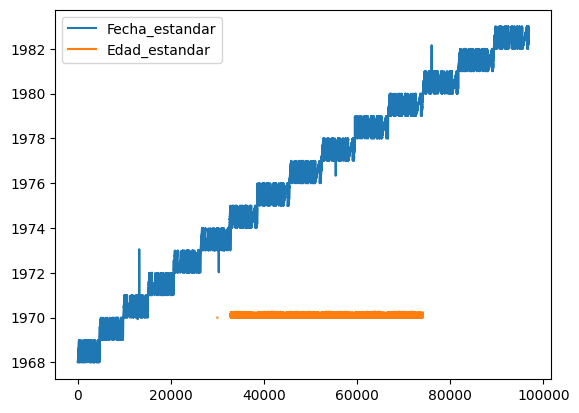

In [3]:
df.plot()

Es posible especificar que columnas usar en el eje _x_ y _y_.

/tmp/ipykernel_75620/2183975205.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_año_tipo = df.pivot_table(index='Fecha_año', columns='Tipo_restos', aggfunc='size')


Tipo_restos,Cadáver,Feto,Recién nacido,Miembros u óseos
Fecha_año,,,,
1968.0,4392,229,34,61
1969.0,4743,185,34,83
1970.0,4928,212,53,89
1971.0,5144,226,45,88
1972.0,5380,197,55,122
1973.0,5726,276,83,129
1974.0,5512,246,52,137
1975.0,6421,225,38,170
1976.0,6519,222,8,143


<Axes: xlabel='Fecha_año'>

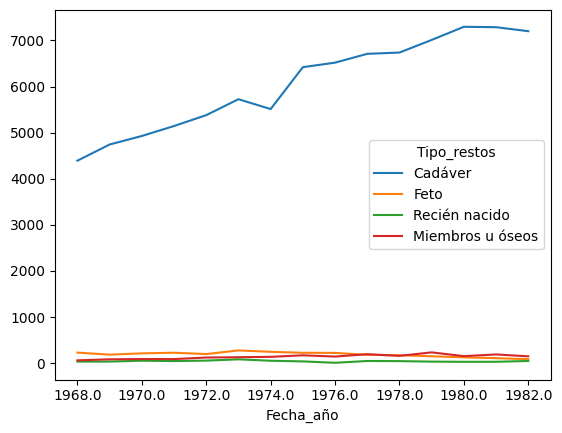

In [4]:
df_año_tipo = df.pivot_table(index='Fecha_año', columns='Tipo_restos', aggfunc='size')
display( df_año_tipo )
df_año_tipo.plot()

### Área

Un gráfico de área es un tipo de gráfico que representa una serie de datos como áreas apiladas abajo de una línea.
Los gráficos de área son útiles para explorar la contribución de una serie de variables, sobre todo en fenómenos temporales. Este tipo de gráfico es útil para mostrar la **relación** entre variables **numéricas o temporales** usando **codificación posicional**. En el caso de varias categorías se pueden colorear los puntos, codificando una variable **categórica** adicional con una **codificación de color**.

<Axes: title={'center': 'Tipo de restos por año'}, xlabel='Fecha_año'>

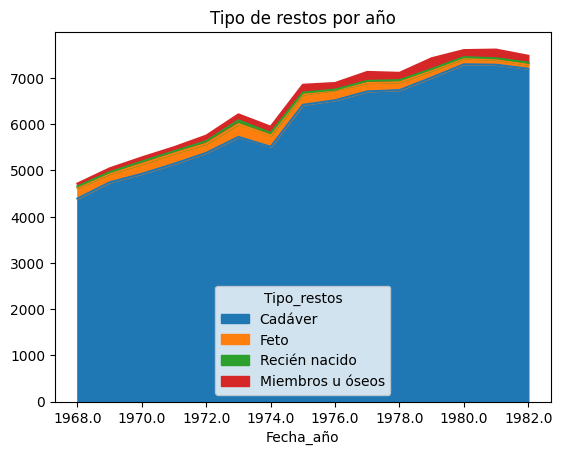

In [5]:
df_año_tipo.plot.area(title='Tipo de restos por año')

### Scatterplot

Un gráfico de dispersión (también conocido como scatter plot en inglés) es un tipo de gráfico que representa datos como una serie de puntos individuales en un sistema de coordenadas cartesianas. Cada punto en el gráfico representa una observación y está ubicado en las coordenadas correspondientes a sus valores en dos variables diferentes.
Los gráficos de dispersión son útiles para explorar patrones, identificar valores atípicos y observar cómo se relacionan dos variables entre sí. Este tipo de gráfico es útil para mostrar la **relación** entre variables **numéricas o temporales** usando **codificación posicional**. En el caso de varias categorías se pueden colorear los puntos, codificando una variable **categórica** adicional con una **codificación de color**.

Por ejemplo, para una gráfica de puntos `scatter` las opciones son:
* `DataFrame.plot(kind='scatter')`
* `DataFrame.plot.scatter()`

Para este gráfico es necesario especificar las columnas que se usarán en el eje `x` y `y`

<Axes: xlabel='Fecha_estandar', ylabel='Edad_estandar'>

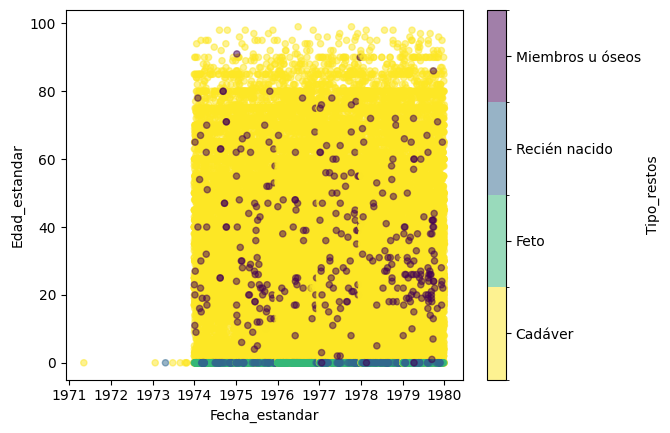

In [6]:
df.plot.scatter(
    x='Fecha_estandar', 
    y='Edad_estandar', 
    c='Tipo_restos',
    colormap='viridis_r',
    alpha=0.5
    )

### Barras

Pandas puede utilizarse para crear gráficos de barras, los cuales son un tipo de gráfico utilizado para representar la **relación** entre variables **categóricas y numéricas** usando una **codificación posicional**. Un gráfico de barras consiste en barras horizontales o verticales que representan las diferentes categorías en el eje _x_ y la frecuencia o valor de cada categoría en el eje _y_.

En este caso, se calcula primero la cantidad de registros para cada tipo de restos. Al ser estos datos de frecuencia de diferentes categorías usaremos el gráfico de barras.

<Axes: xlabel='Tipo_restos'>

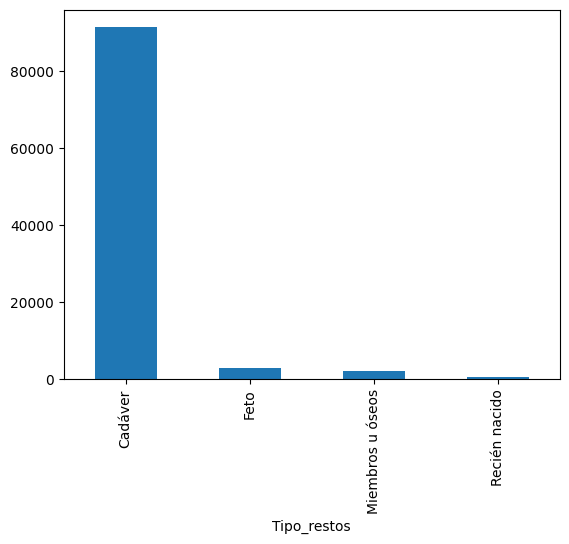

In [7]:
df['Tipo_restos'].value_counts().plot.bar()

La opción `(kind='barh')` permite hacer gráficos con barras horizontales.

<Axes: ylabel='Edad_grupo'>

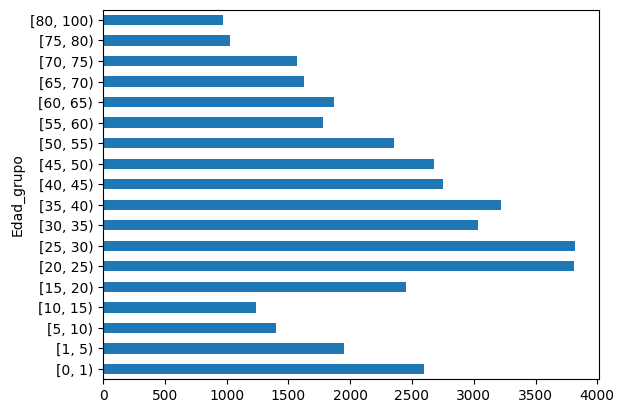

In [9]:
df['Edad_grupo'].value_counts().sort_index().plot.barh()

Se pueden hacer gráficos más complicados dependiendo de los tipos de datos existentes. Por ejemplo, comparemos la distribución de sexo de acuerdo al tipo de restos. Para hacer esto necesitamos calcular cuantos registros hay para cada combinación de conocido/desconocido y de sexo. Haremos eso calculando la tabla pivote y la función `size`. 

Una tabla pivote resume una tabla de datos larga y detallada en una tabla resumida más corta que muestra información resumida y agregada sobre los datos. En una tabla pivote, los datos se organizan en filas y columnas y se agregan a través de una función de agregación, como suma, promedio, máximo o mínimo. 

Podemos gráficar esto como barras. Las barras se agruparan en el eje de las x por los indices y se les asignaran colores de acuerdo con las columnas. El eje de las y contiene el valor numerico o de conteo.

/tmp/ipykernel_75620/2794271981.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_tipo_sexo = pd.pivot_table(df, index='Tipo_restos', columns='Sexo',


Sexo,Femenino,Masculino,S-D
Tipo_restos,,,
Cadáver,19503,71182,569
Feto,462,662,1720
Recién nacido,251,379,3
Miembros u óseos,385,1518,210


<Axes: xlabel='Tipo_restos'>

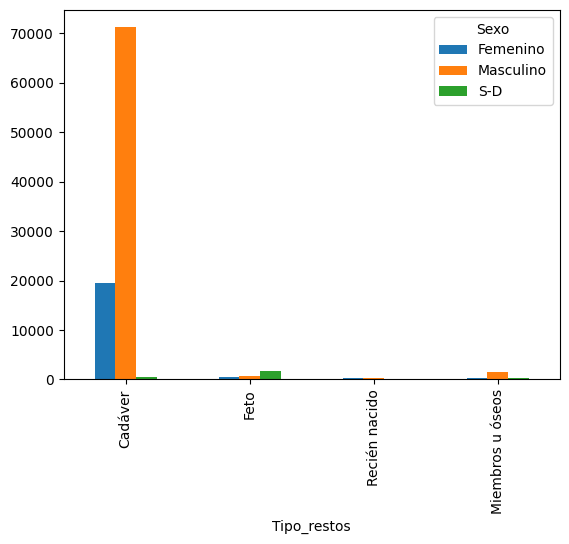

In [10]:
df_tipo_sexo = pd.pivot_table(df, index='Tipo_restos', columns='Sexo', aggfunc='size')
display( df_tipo_sexo )
df_tipo_sexo.plot.bar()

Podemos apilar las barras que tienen un mismo indice o tipo de restos para comparar los datos más facilmente.

<Axes: xlabel='Tipo_restos'>

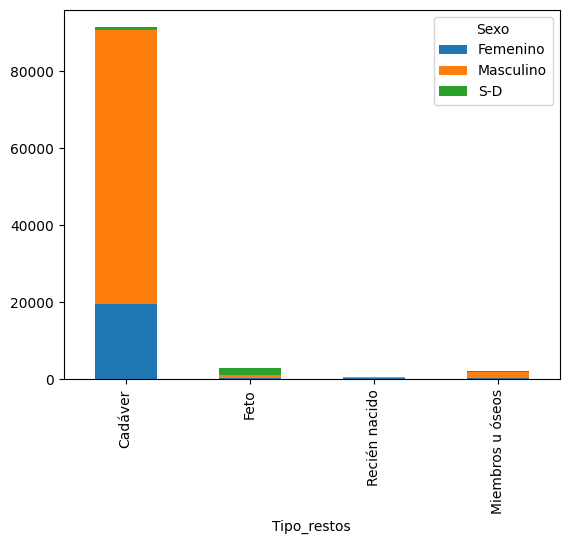

In [11]:
df_tipo_sexo.plot.bar(stacked=True)

## 5.b Opciones de figura

Es posible configurar varios detalles de una figura en `matplotlib`, pero es necesario saber cómo referirse a cada elemento, lo cual podemos consultar en la documentación de [anatomía de una figura](https://matplotlib.org/stable/gallery/showcase/anatomy.html).

Algunos elementos útiles:
* Figura (`plt.figure()` o `fig` en objetos `Figure`): Es el lienzo principal donde se dibujan los gráficos. Puede contener uno o varios ejes (subgráficos).
* Ejes (`ax` en objetos `Axes`, creados con `plt.subplots()` o `fig.add_subplot()`): Representa un gráfico dentro de la figura. Puede haber múltiples ejes en una figura.
* Ejes X e Y (`ax.xaxis` y `ax.yaxis`): Son las líneas de referencia horizontal y vertical que definen el espacio del gráfico.
* Límites del eje (`ax.set_xlim()` y `ax.set_ylim()`): Determinan el rango visible en los ejes X e Y.
* Título (`ax.set_title()`): Es el nombre o descripción principal del gráfico.
* Etiquetas de los ejes (`ax.set_xlabel()` y `ax.set_ylabel()`): Son las descripciones de los ejes X e Y.
* Leyenda (`ax.legend()`): Identifica las distintas líneas o categorías en el gráfico.
* Cuadrícula (`ax.grid(True)`): Son líneas de referencia que facilitan la lectura del gráfico.
* Marcas y etiquetas de los ejes (`ax.set_xticks()`, `ax.set_xticklabels()`, `ax.set_yticks(),` `ax.set_yticklabels()): Son los valores y etiquetas en los ejes X e Y.
* Barras de colores (`fig.colorbar()`): Se usa en gráficos de mapas de calor o dispersión para indicar la escala de colores.

<div>
<img src="./extras/matplotlib_anatomy_figure.png" width="600"/>
</div>

En este caso hemos usado varias opciones para editar la gráfica:
* `figsize=[largo, alto]`: tamaño de la figura
* `title=str`: título
* `xlabel=str` y `ylabel=str`: etiqueta del eje _x_ y _y_, si no se quiere incluir etiqueta del eje se le puede pasar un string vacío `""`:

<Axes: title={'center': 'Sexo por tipo de restos'}, xlabel='Ingresos'>

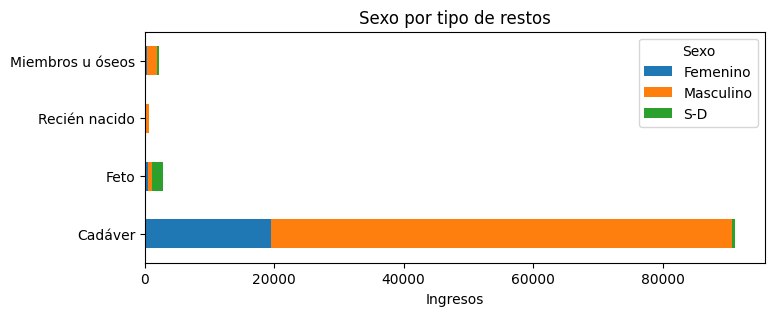

In [12]:
df_tipo_sexo.plot.barh(
    stacked=True, 
    figsize=[8,3],  # tamaño de figura
    title="Sexo por tipo de restos", 
    xlabel="Ingresos", 
    ylabel=""
    )

### Color

Generemos una gráfica similar pero para conocido y desconocido

/tmp/ipykernel_75620/248678561.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_tipo_descon = pd.pivot_table(df, index='Tipo_restos', columns='Conocido_desconocido', aggfunc='size')


<Axes: title={'center': 'Conocido/desconocido pot tipo de restos'}, xlabel='Ingresos'>

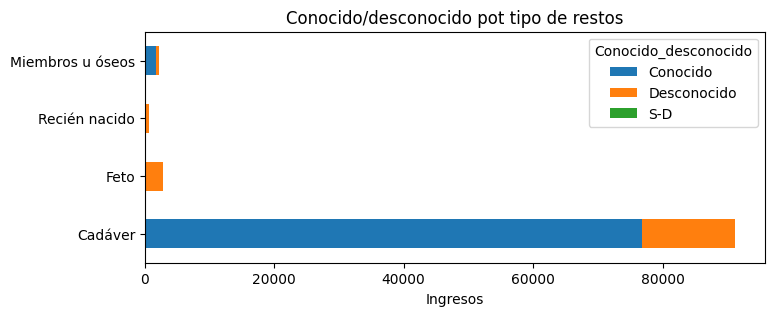

In [13]:
df_tipo_descon = pd.pivot_table(df, index='Tipo_restos', columns='Conocido_desconocido', aggfunc='size')
df_tipo_descon.plot.barh(
    stacked=True, 
    figsize=[8,3],
    title="Conocido/desconocido pot tipo de restos",
    xlabel="Ingresos", 
    ylabel="", #etiqueta en y vacia
    )

Podemos notar que asigno automáticamente los mismos colores a ambas gráficas. Esto puede ser poco claro para los lectores. A continuación vamos a generar una escala de colores.

En primer lugar, debemos de seleccionar las variables y asignarles la codificación visual.

* Tipo de restos (categórico): eje _x_
* Incidencias (numérico): eje _y_
* Sexo (categórico): color

Ya que usaremos el color para el sexo y el tipo de restos, es necesario asignar colores únicos. 
Del sexo hay tres opciones, mientras que desconocido/conocido son tres, sin embargo, `S-D` se encuentra en ambos. Entonces, en total necesitamos una escala cualitativa de cinco colores, los cuales elegiremos usando una escala cualitativa de [ColorBrewer](https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=7).

Una vez hecho esto lo guardaremos en un diccionario.

In [14]:
dic_col ={'Femenino':'#bebada', 'Masculino':'#80b1d3', 
          'Desconocido':'#fccde5', 'Conocido':'#b3de69',
          'S-D':'#d9d9d9', }
dic_col

{'Femenino': '#bebada',
 'Masculino': '#80b1d3',
 'Desconocido': '#fccde5',
 'Conocido': '#b3de69',
 'S-D': '#d9d9d9'}

La opción `color` sirve para especificar los colores. Puede recibir varios parámetros, en este caso le pasaremos la codificación de colores que hemos escogido.

Nota como le pasamos el mismo diccionario a ambas gráficas y en cada gráfica se resuelven los distintos colores.

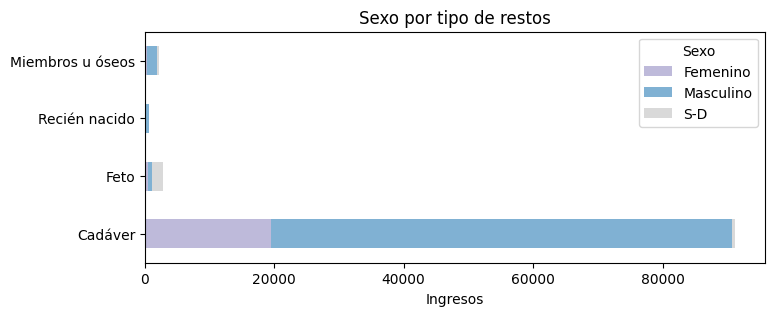

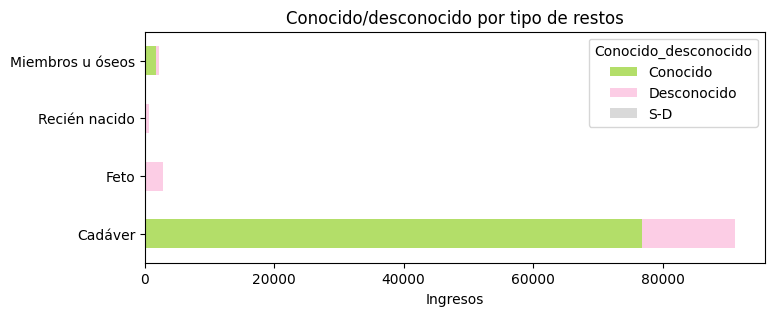

In [15]:
df_tipo_sexo.plot.barh(
    stacked=True, 
    figsize=[8,3],
    color=dic_col, # diccionario con colores por categoría
    title="Sexo por tipo de restos",
    xlabel="Ingresos",
    ylabel=""
    )
plt.show() # comando para desplegar la gráfica

df_tipo_descon.plot.barh(
    stacked=True, 
    figsize=[8,3],
    color=dic_col, # diccionario con colores por categoría
    title="Conocido/desconocido por tipo de restos",
    xlabel="Ingresos", 
    ylabel="", 
    )
plt.show()

### Ejes logísticos

En este caso, la diferencia entre la cantidad de cadáveres y otro tipo de ingresos es de varios órdenes de magnitud. En este caso puede ser recomendable usar una escala logarítmica. Sin embargo, es necesario usar estas escalas con sumo cuidado, ya que son [difíciles de leer incluso para especialistas](https://pubmed.ncbi.nlm.nih.gov/30013132/). Sin embargo, estas escalas son muy útiles cuando se tienen datos con distribución exponencial.

<Axes: title={'center': 'Sexo por tipo de restos'}, xlabel='Ingresos'>

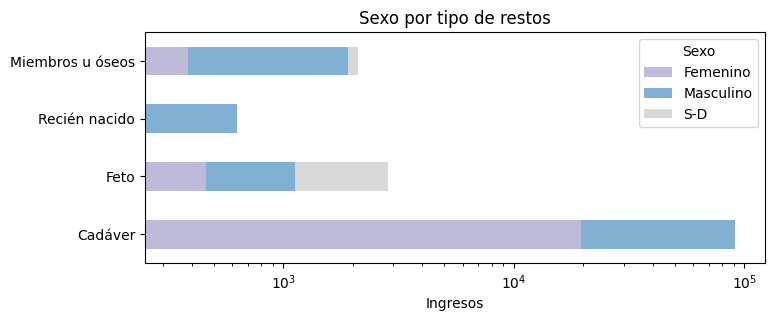

In [16]:
df_tipo_sexo.plot.barh(
    stacked=True,
    figsize=[8,3],
    color=dic_col, 
    logx=True, # escala logaritmica en eje x
    title="Sexo por tipo de restos",
    xlabel="Ingresos",
    ylabel=""
    )

Podemos modificar los ticks (los números en el eje _x_ que representan la escala) con el siguiente código, el cual fue generado por ChatGPT usando el siguiente prompt y después editado para ajustarlo a nuestros datos.

> Usando la función pandas.plot.barh() de python, genera una gráfica de barras con el eje x en escala logarítmica. Los ticks del eje x de la gráfica debén desplegarse como números (10, 100, 1000) y no en notación científica.

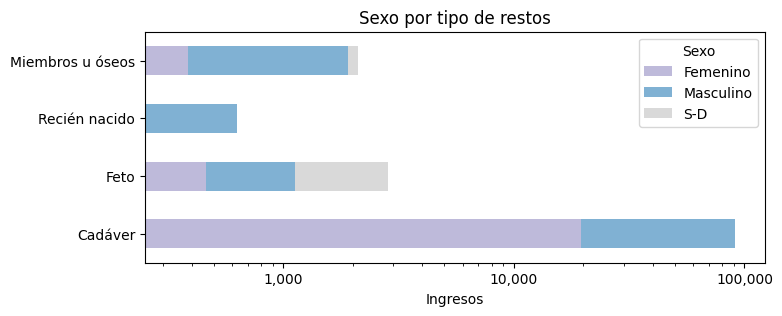

In [17]:
from matplotlib.ticker import FuncFormatter

# Crear la gráfica de barras con el eje X en escala logarítmica
ax = df_tipo_sexo.plot.barh( #guardamos en ax la figura para modificar
    stacked=True, 
    figsize=[8,3],
    color=dic_col, 
    logx=True,
    title="Sexo por tipo de restos",
    xlabel="Ingresos", 
    ylabel=""
    )

# Ajustar los ticks del eje x para mostrar números en lugar de notación científica
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Mostrar gráfica
plt.show()

### Guardar figuras

A veces es necesario almacenar los gráficos y las figuras creadas como archivos de imagen. 
Para guardar una imagen de `matplotlib` se usa el comando `savefig()`. Este comando guarda la última imagen que ha sido generada antes del comando.

El comando `savefig()` tiene varias opciones, las cuales se pueden ver en la documentación. Algunas de estas son:
* dpi: la resolución en puntos por pulgada, algunas revistas exigen resoluciones máximas o mínimas.
* format: el formato de la imagen (png, pdf, svg o eps), este se puede especificar en la terminación del nombre del archivo o en el comando.
* bbox_inches: porción de la imagen a guardar
* pad_inches: espacio en blanco alrededor de la figura
* transparent: usar un fondo transparente o blanco

Existen varios formatos en los que se pueden guardar las imágenes, con sus ventajas y desventajas.
* **PNG** es principalmente utilizado para imágenes en línea, ya que es compatible con navegadores web.
    - Ventajas: soporta transparencia y es un formato sin pérdida de calidad, lo que significa que la imagen no pierde calidad al ser guardada en este formato.
    - Desventajas: no es muy bueno para imágenes con gradientes o colores muy complejos, ya que puede generar archivos de gran tamaño.
* **SVG** es utilizado principalmente para gráficos vectoriales, y es ideal para sitios web y aplicaciones móviles.
    - Ventajas: es un formato vectorial, lo que significa que se puede escalar sin perder calidad, y es muy útil para diseños de logotipos, gráficos e iconos.
    - Desventajas: no es muy bueno para imágenes complejas con muchos detalles y sombras.
* **PDF** es utilizado principalmente para documentos, como contratos, manuales y formularios.
    - Ventajas: es un formato muy versátil que puede contener texto, imágenes, gráficos y otros elementos en un solo archivo. Además, puede ser leído en cualquier dispositivo o sistema operativo.
    - Desventajas: no es el mejor formato para imágenes de alta calidad, ya que puede comprimirlas y perder calidad.
* **EPS** es utilizado principalmente para el diseño gráfico.
    - Ventajas: es un formato vectorial muy utilizado en el diseño gráfico y la impresión, ya que puede ser escalado sin perder calidad y puede incluir transparencias y otros efectos especiales.
    - Desventajas: no es muy útil para imágenes complejas o fotografías.

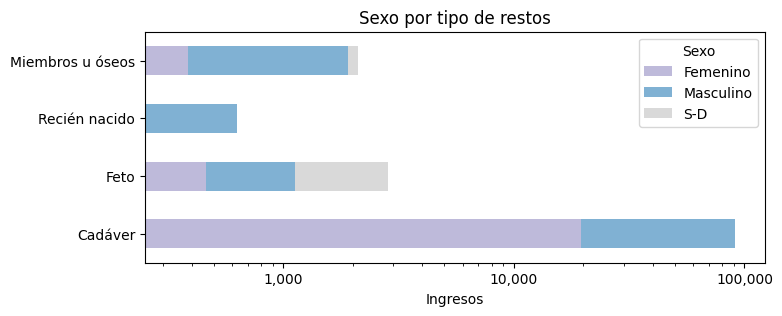

In [19]:
ax = df_tipo_sexo.plot.barh( 
    stacked=True, 
    figsize=[8,3],
    color=dic_col, 
    logx=True,
    title="Sexo por tipo de restos",
    xlabel="Ingresos",
    ylabel=""
    )

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig("images/tiporestos_vs_sexo.png") # comando para guardar la gráfica

## 5.c Distribución

La distribución de un conjunto de datos es la forma en que los datos se agrupan y se distribuyen a lo largo de un rango de valores. La distribución puede ser simétrica o asimétrica, y puede tener una o varias modas o picos.

Algunas distribuciones comunes incluyen la distribución normal, la distribución uniforme, la distribución de Poisson y la distribución exponencial. Cada una de estas distribuciones tiene una forma característica y se utiliza para modelar diferentes tipos de datos.

Es importante comprender la distribución de los datos porque puede afectar cómo se analizan y se interpretan. Por ejemplo, si los datos se distribuyen normalmente, se pueden utilizar pruebas estadísticas específicas para analizarlos, mientras que si los datos tienen una distribución asimétrica, puede ser necesario utilizar diferentes técnicas de análisis.

En resumen, la distribución de un conjunto de datos se refiere a la forma en que los datos se agrupan y se distribuyen a lo largo de un rango de valores, y es importante comprenderla para poder analizar y interpretar los datos de manera efectiva.

### Boxplot

Un boxplot, también conocido como diagrama de caja y bigotes, es una representación gráfica de una distribución de datos a través de cinco estadísticas principales: el valor mínimo, el primer cuartil (Q1), la mediana, el tercer cuartil (Q3) y el valor máximo. Estas estadísticas se representan mediante un rectángulo (la caja) y dos líneas verticales (los bigotes). Este tipo de gráfico es útil para mostrar la **distribución** de una variable **numérica** usando **codificación posicional**.


El rectángulo en el centro del boxplot representa el rango intercuartil (IQR), que es la distancia entre el primer cuartil y el tercer cuartil. La mediana se muestra como una línea dentro del rectángulo. Los bigotes se extienden desde la caja hasta el valor mínimo y máximo, excluyendo los valores atípicos.

Los valores atípicos se muestran como puntos individuales fuera de los bigotes. Estos son valores que se encuentran a una distancia significativa de la mediana y que pueden tener un impacto significativo en la interpretación de los datos.

El boxplot es una herramienta útil para visualizar la distribución de un conjunto de datos y puede ayudar a identificar valores atípicos y la simetría de la distribución. También se puede usar para comparar la distribución de varios conjuntos de datos en la misma figura.

<Axes: >

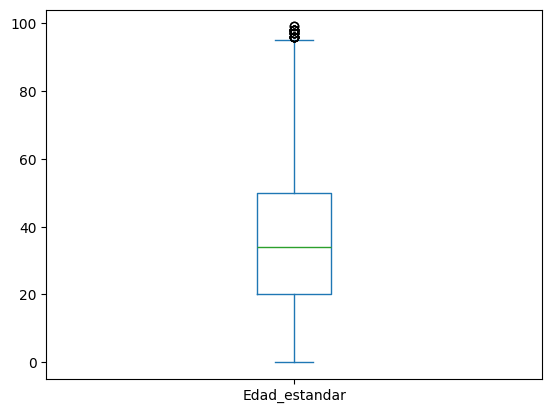

In [20]:
df['Edad_estandar'].plot.box()

### Histogramas

Un gráfico de histograma es un tipo de gráfico utilizado para representar la distribución de frecuencia de un conjunto de datos continuos. En este tipo de gráfico, se divide el rango de los datos en un número determinado de intervalos o "bins", y se cuenta cuántos datos caen dentro de cada intervalo. Este tipo de gráfico es útil para mostrar la **distribución** de una variable **numérica** usando **codificación posicional** para representar rangos de valores dentro de la misma variable.

El eje horizontal del gráfico representa el rango de valores de los datos, y se divide en los intervalos o bins mencionados anteriormente. El eje vertical muestra la frecuencia o la cantidad de observaciones que se encuentran en cada intervalo.

Por ejemplo, podemos usar esto para ver la distribución de edades.

<Axes: ylabel='Frequency'>

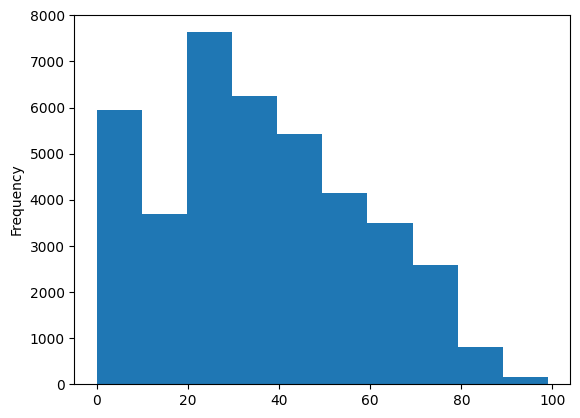

In [21]:
df['Edad_estandar'].plot.hist()

En los histogramas es posible que se generen artefactos a causa del tamaño de los bins. Pandas determina automáticamente cuáles son los bins, pero es posible crear bins de distintos tamaños si nos interesa fijarnos en intervalos particulares.

<Axes: ylabel='Frequency'>

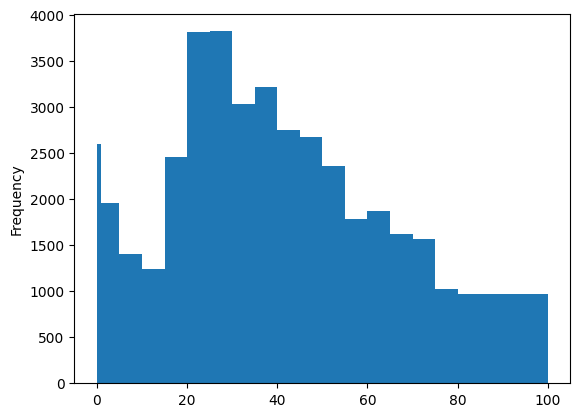

In [22]:
df['Edad_estandar'].plot.hist(bins=[0,1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,100])

### KDE

KDE es la abreviación de Kernel Density Estimation, que en español se traduce como estimación de la densidad de núcleo o estimación de la densidad de kernel. Es una técnica utilizada para estimar la distribución de probabilidad subyacente de un conjunto de datos continuos. Este tipo de gráfico es útil para mostrar la **distribución** de una variable **numérica** usando **codificación posicional** de manera suavizada.

En lugar de representar los datos con un histograma, que consiste en contar la cantidad de observaciones en cada intervalo, el KDE utiliza una función de densidad de probabilidad suave para modelar la distribución de los datos. Esta función es una suma ponderada de funciones de núcleo, donde cada función de núcleo es una función de probabilidad que se centra en un punto de datos individual.

El resultado es una curva suave que representa la distribución de probabilidad subyacente del conjunto de datos. El KDE es útil para visualizar la forma de la distribución de datos con pocos elementos visuales y puede ayudar a identificar patrones en los datos que pueden ser difíciles de ver con otros métodos de visualización. Sin embargo, no son recomendados para conjuntos con pocos números.

Veamos la distribución de la Edad, compara el comportamiento alrededor del cero con respecto a los dos histogramas anteriores.

<Axes: ylabel='Density'>

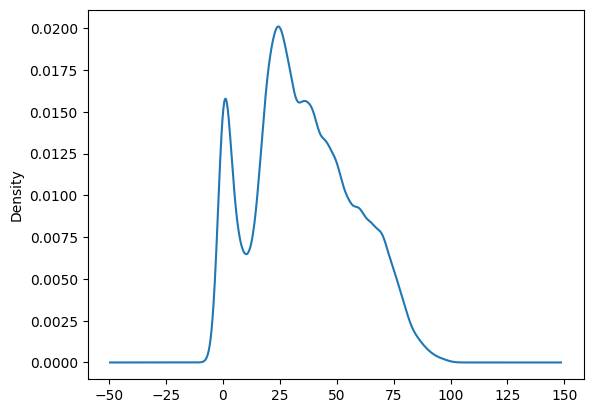

In [23]:
df['Edad_estandar'].plot.kde()

### Violinplot

Un gráfico violín muestra la distribución de los datos a través de una "violín", que es una forma simétrica similar a un violín. Este tipo de gráfico es útil para mostrar la **distribución** de una variable **numérica** usando **codificación posicional** de manera suavizada. Además, este gráfico permite representar variables **categóricas** usando **codificación posicional y de color**. Es especialmente útil cuando se quiere comparar la distribución de varias variables, y permite visualizar cómo varían las distribuciones entre diferentes grupos.

En un `violinplot` de `seaborn`, el ancho del violín en un punto dado muestra la densidad de puntos de datos en esa ubicación. Las áreas más anchas representan una mayor densidad de puntos de datos, mientras que las áreas más estrechas representan una menor densidad de puntos de datos. En la parte central del violín se puede encontrar una boxplot que muestra la mediana, el primer y tercer cuartil, y los valores mínimo y máximo.

En caso de pasar el DataFrame entero, Seaborn lo interpretará como una matriz y graficará la distribución de cada columna. Por lo tanto, es importante asegurarse de que los datos sean comparables.
Además, es posible configurar y editar la gráfica usando los comandos de la misma función o de Matplotlib, les recomiendo revisar la [documentación de `violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Por ejemplo, veamos la distribución de edades.

<Axes: ylabel='Edad_estandar'>

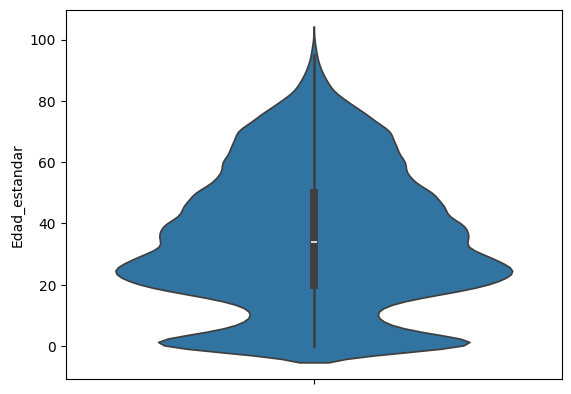

In [24]:
sns.violinplot(df['Edad_estandar'])

Seaborn puede realizar operaciones sencillas de datos y de codificación visual. Por ejemplo, le podemos pedir que divida los valores de una columna por las características de otra, asignando la posición en el eje _x_, eje _y_ y el color a cada variable.

Por ejemplo, en este caso graficaremos la distribución de la variable `Edad_estandar` en el eje _y_ cómo es numérica su densidad corresponde al ancho del violín. La variable `Conocido_desconocido` se codificará en la posición del eje x, cómo es una variable categórica se dividirá cada categoría en un violín diferente en el eje x. Finalmente, la variable `Sexo` será codificado en mitades de violines de diferente color, lo cual facilitará su comparación. Para establecer el código de color usaremos la variable `pallete y el diccionario de colores que determinamos anteriormente.

<Axes: xlabel='Conocido_desconocido', ylabel='Edad_estandar'>

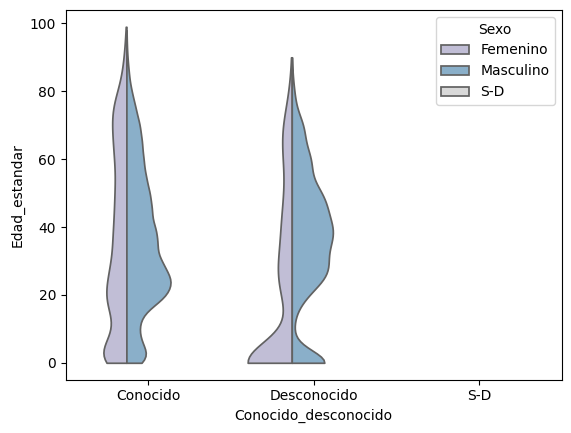

In [30]:
data = df.loc[(df['Conocido_desconocido']!='S-D') & (df['Sexo']!='S-D'), 
              ['Conocido_desconocido','Edad_estandar', 'Sexo']]

sns.violinplot(data, 
               x='Conocido_desconocido', 
               y='Edad_estandar', 
               hue='Sexo', 
               split=True, 
               inner=None, 
               cut=0,
               palette=dic_col
              )

## 5.d Gráficos múltiples

Un gráfico múltiple o sub-gráficos, es una forma de mostrar varios gráficos en una sola figura. En lugar de crear varias figuras para cada gráfico, se pueden combinar varios gráficos en una sola figura para facilitar la comparación y el análisis. Esta es una forma de utilizar **codificación posicional** para representar varias variables **categóricas**. 

En un multi-gráfico, se pueden mostrar varios tipos de gráficos, como gráficos de barras, gráficos de líneas, gráficos de dispersión, histogramas, entre otros. Cada gráfico se coloca en una sección separada de la figura y se etiqueta con un título para identificarlo. Al permitir usar distintas gráficas dentro de cada subplot se pueden lograr comparaciones usando múltiples codificaciones.

Los multi-gráficos son útiles para mostrar diferentes aspectos de un conjunto de datos en una sola figura, lo que facilita la comparación y el análisis. Por ejemplo, se pueden comparar varios conjuntos de datos en diferentes gráficos de barras, o mostrar la relación entre dos variables en un gráfico de dispersión y la distribución de una variable en un histograma.

Por ejemplo, supongamos que nos interesa comparar las distribuciones de edad separadas por si las personas son conocidas o desconocidas. En ese caso podríamos seleccionar los subconjuntos de datos y hacer gráficas separadas. Sin embargo, sería mejor hacer un multi-gráfico para poder comparar.

Para hacer esto usaremos los sub-gráficos de Matplotlib. 
El comando `pandas.plot()` nos regresa un objeto `axes`, el cual puede ser incluido en  una figura de Matplotlib como una sub-gráfica.


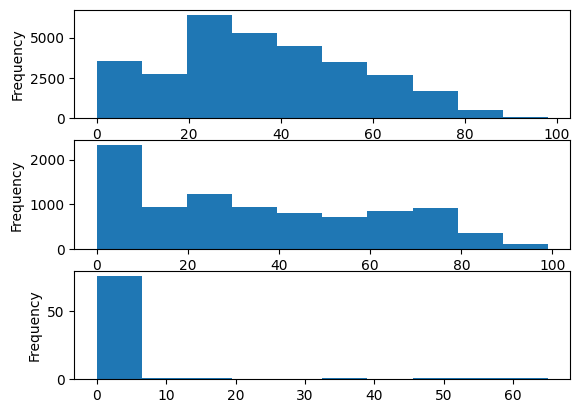

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=1)

df.loc[df['Sexo']=='Masculino','Edad_estandar'] \
  .plot.hist(ax=axes[0])

df.loc[df['Sexo']=='Femenino','Edad_estandar'] \
  .plot.hist(ax=axes[1])

df.loc[df['Sexo']=='S-D','Edad_estandar'] \
  .plot.hist(ax=axes[2])

plt.show()

Es posible configurar esta imagen para mejorar su apariencia, incluyendo el tamaño de la figura, leyendas, ejes, etiquetas, colores, etc.

Al usar sub-gráficos se recomienda fuertemente garantizar que las escalas y tamaño de bins sean los mismos en todas las gráficas alineadas horizontal o verticalmente, para facilitar la comparación. 

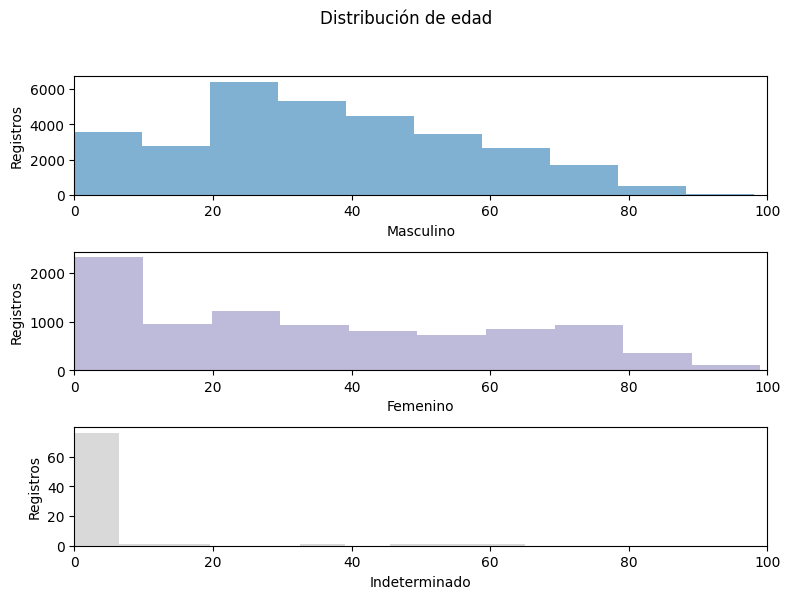

In [32]:
# fig es todo es espacio de graficación
# mientras que axes tendrá cada subgráfica
fig, axes = plt.subplots(nrows=3, ncols=1)

fig.suptitle('Distribución de edad') # si usamos subgráficas este es el título superior de la figuta
fig.set_figheight(6) # altura de la figura
fig.set_figwidth(8) # ancho de la figura
fig.tight_layout(pad=2) #espacio entre subgráficas

# Masculino grafica 0
df.loc[df['Sexo']=='Masculino','Edad_estandar'] \
  .plot.hist(ax=axes[0],  # posición en los subplots
             xlim=[0,100], # valores mínimos y máximos en el eje x
             color=dic_col['Masculino'] # consultamos el diccionario de colores para usar la códificación de color
            ) 
axes[0].set_xlabel('Masculino') # la etiqueta del eje x
axes[0].set_ylabel('Registros') # la etiqueta del eje x

# Femenino grafica 1
df.loc[df['Sexo']=='Femenino','Edad_estandar'] \
  .plot.hist(ax=axes[1],
             xlim=[0,100], 
             color=dic_col['Femenino']
            )
axes[1].set_xlabel('Femenino')
axes[1].set_ylabel('Registros')

# Indeterminado grafica 2
df.loc[df['Sexo']=='S-D','Edad_estandar'] \
  .plot.hist(ax=axes[2], 
             xlim=[0,100], 
             color=dic_col['S-D']
            )
axes[2].set_xlabel('Indeterminado')
axes[2].set_ylabel('Registros')

plt.show() # mostrar toda la figua

En caso de poner filas y columnas es necesario usar un indice bidimencional en `axes=[filas,columnas]`.

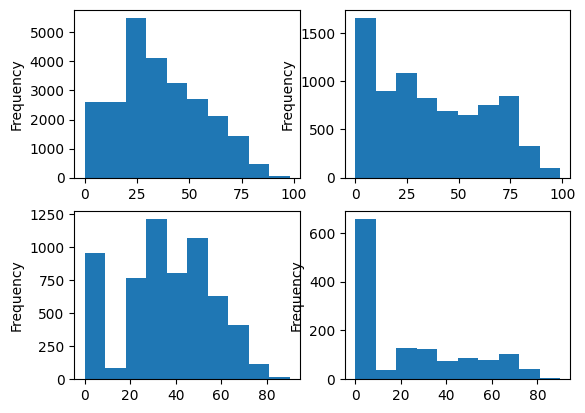

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df.loc[(df['Sexo']=='Masculino') & (df['Conocido_desconocido']=='Conocido'),'Edad_estandar'] \
  .plot.hist(ax=axes[0,0])
df.loc[(df['Sexo']=='Femenino') & (df['Conocido_desconocido']=='Conocido'),'Edad_estandar'] \
  .plot.hist(ax=axes[0,1])
df.loc[(df['Sexo']=='Masculino') & (df['Conocido_desconocido']=='Desconocido'),'Edad_estandar'] \
  .plot.hist(ax=axes[1,0])
df.loc[(df['Sexo']=='Femenino') & (df['Conocido_desconocido']=='Desconocido'),'Edad_estandar'] \
  .plot.hist(ax=axes[1,1])

plt.show()

### Ejercicio

Configura esta gráfica para agregar:
* Bins de tamaño cinco, con un bin especial para el grupo de menores de un año
* Color
* Leyendas
* Ejes comparables
* Una modificación adicional a tu gusto

## 5.e Heatmaps y clustermaps

Un heatmap, o mapa de calor, es un tipo de gráfico que utiliza colores para representar valores numéricos en una matriz o tabla de datos. Este tipo de gráfico es útil para mostrar la **relación** entre tres variables, dos variables **categóricas**, incluyendo variables numéricas/temporales agrupadas, con una variable **numérica**. En este caso se una **codificación posicional** para las dos variables que se colocan en los ejes y una **codificación de color** para la variable numérica.

En un heatmap, cada área o celda de la tabla es asignada a un color según su valor numérico, y las celdas con valores más altos son representadas por colores más oscuros y las celdas con valores más bajos son representadas por colores más claros. Un ejemplo especial de heatmap son los mapas de color.

Existen varios [tipos de heatmap](https://inforiver.com/insights/heatmaps-in-data-visualization-a-comprehensive-introduction/).
<div>
<img src="./extras/heatmap_types.jpeg" width="600"/>
</div>

Los heatmap son especialmente útiles para visualizar patrones y tendencias en grandes conjuntos de datos, ya que permiten detectar fácilmente las regiones con valores más altos o más bajos. También son útiles para visualizar la relación entre dos variables, ya que pueden mostrar cómo los valores de una variable se relacionan con los valores de otra variable.

En este caso usaremos la tabla de ingresos por grupo de edad anual de ejemplo.

In [34]:
df_año_edad = df.pivot_table(index='Fecha_año', columns='Edad_grupo', aggfunc='size')
df_año_edad

/tmp/ipykernel_75620/1567619035.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_año_edad = df.pivot_table(index='Fecha_año', columns='Edad_grupo', aggfunc='size')


Edad_grupo,"[0, 1)","[1, 5)","[5, 10)","[10, 15)","[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 70)","[70, 75)","[75, 80)","[80, 100)"
Fecha_año,,,,,,,,,,,,,,,,,,
1968.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1969.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1970.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1971.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1972.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1973.0,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1974.0,474,282,184,159,315,507,479,412,483,399,346,350,236,278,243,226,107,115
1975.0,473,343,250,216,376,603,609,513,611,452,429,358,268,348,261,285,168,146
1976.0,429,341,244,222,412,597,628,519,532,454,467,379,311,291,272,276,192,164


Podemos visualizar esto como un heatmap con seaborn. El orden de filas y columnas es igual al de la matriz, pero los valores numéricos son codificados con una escala de color, la cual se puede ver del lado derecho.

<Axes: xlabel='Edad_grupo', ylabel='Fecha_año'>

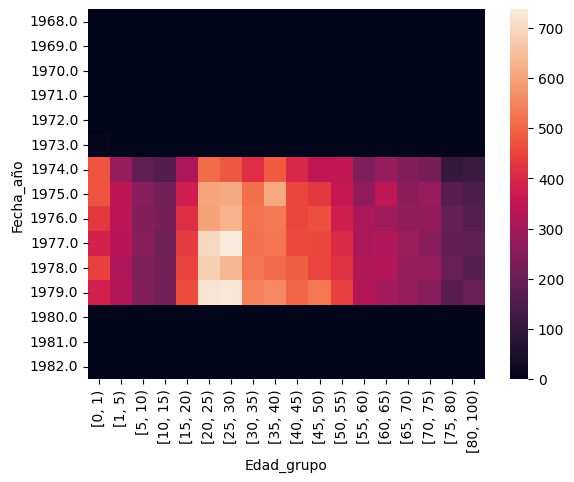

In [35]:
sns.heatmap(df_año_edad)

Es posible modificar la apariencia usando comandos de seaborn y maptplotlib. Por ejemplo, asignaremos la escala de color `viridis_r`, mostremos los valores numéricos en cada celda y modifiquemos los ejes.

[Text(0.5, 23.52222222222222, 'Edad'), Text(50.722222222222214, 0.5, 'Año')]

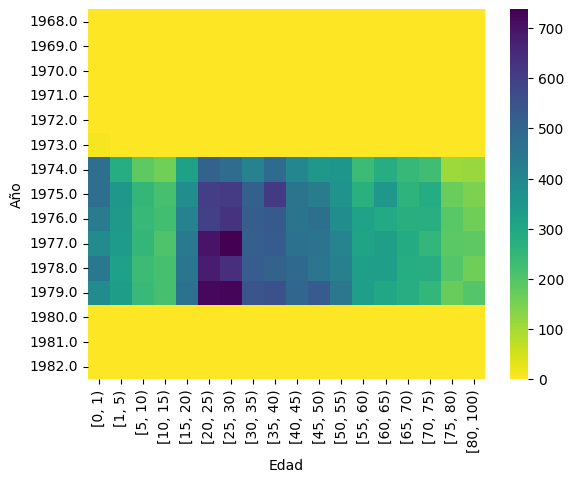

In [37]:
ax = sns.heatmap(df_año_edad, annot=True, cmap='viridis_r')
ax.set(xlabel="Edad", ylabel="Año")

Un clustermap, o mapa de clústeres, es un tipo de mapa de calor que muestra la relación entre variables y observaciones en un conjunto de datos utilizando la agrupación jerárquica de datos. En un clustermap, los datos se organizan de tal manera que las variables y las observaciones con patrones similares se agrupan juntas.

Un clustermap se divide en dos partes: la parte superior muestra la agrupación de variables, mientras que la parte izquierda muestra la agrupación de observaciones. Cada fila y columna representa una variable o una observación, respectivamente, y las celdas contienen valores numéricos que se corresponden con la relación entre la variable y la observación.

La agrupación de variables y observaciones se representa mediante dendrogramas que se ubican en la parte superior e izquierda del clustermap. En un dendrograma, la altura de cada rama indica la distancia entre los clústeres que se agrupan en esa rama. Los clústeres que se agrupan en una rama más baja del dendrograma están más relacionados entre sí que los clústeres que se agrupan en una rama más alta.

En un clustermap, los valores numéricos de cada celda se representan mediante una escala de colores, de manera similar a un heatmap. Los colores más claros suelen representar valores bajos y los colores más oscuros representan valores altos.

La interpretación de un clustermap implica identificar los patrones de agrupación de las variables y observaciones. La agrupación de variables o observaciones similares puede indicar la existencia de patrones o relaciones específicas en el conjunto de datos. Además, el análisis de la ubicación de las variables y observaciones en el clustermap puede ayudar a identificar las correlaciones y las asociaciones entre las diferentes variables del conjunto de datos.

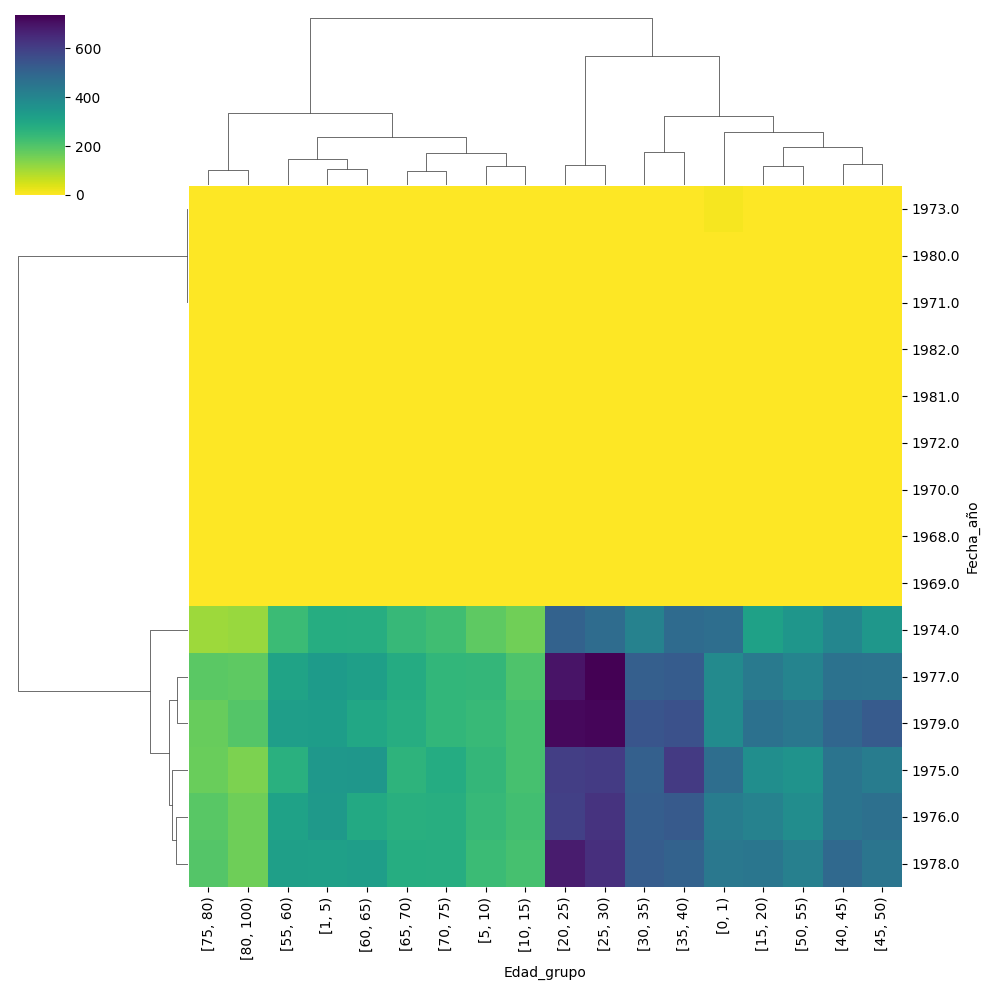

In [38]:
sns.clustermap(df_año_edad, cmap='viridis_r')

Es posible solo realizar el análisis de cluster en las filas o columnas si nos interesa mantener el orden de alguna en particular

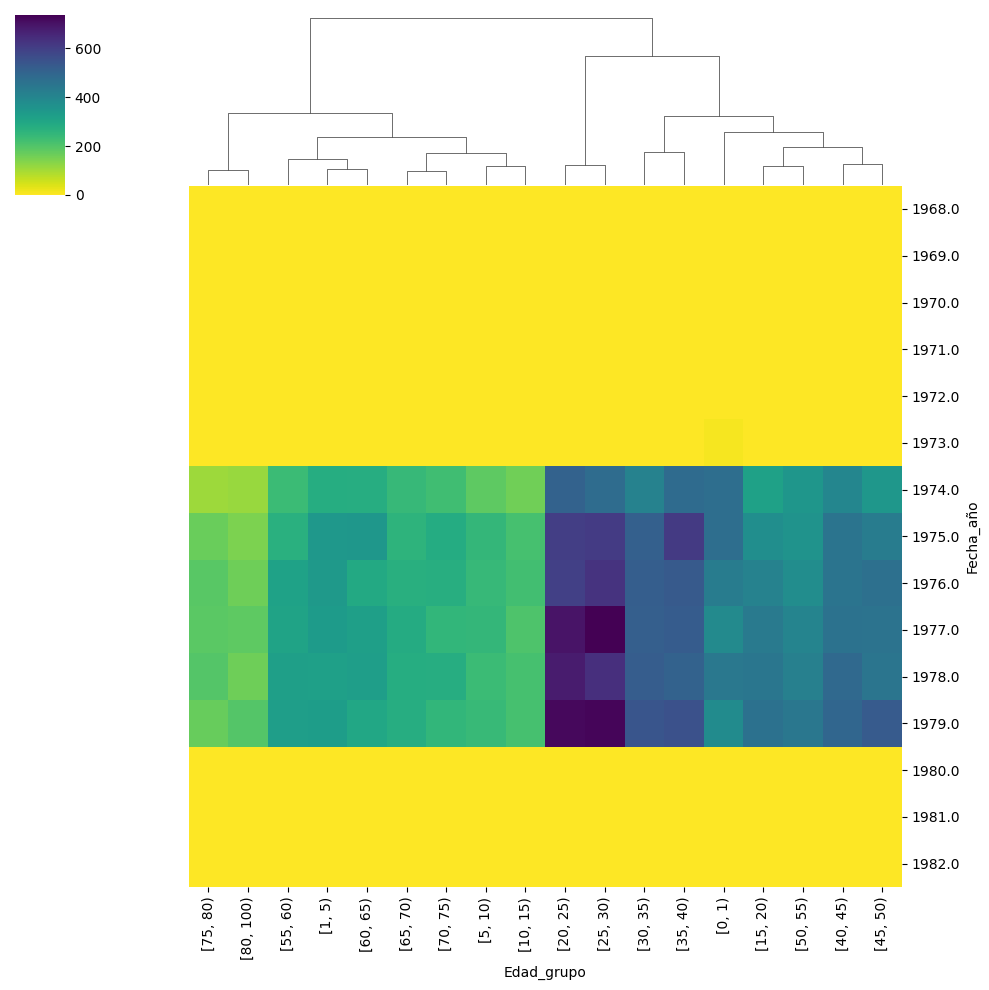

In [39]:
sns.clustermap(df_año_edad, cmap='viridis_r',row_cluster=False)

## 5.f Normalización

La normalización de datos es un proceso mediante el cual se ajustan los valores de un conjunto de datos a una escala común, sin distorsionar las diferencias entre ellos. Se utiliza para hacer comparaciones más equitativas entre variables que pueden tener unidades o rangos de magnitud muy diferentes. En este caso usaremos la tabla de ingresos por tipo de restos anual de ejemplo.

In [40]:
df_año_tipo

Tipo_restos,Cadáver,Feto,Recién nacido,Miembros u óseos
Fecha_año,,,,
1968.0,4392,229,34,61
1969.0,4743,185,34,83
1970.0,4928,212,53,89
1971.0,5144,226,45,88
1972.0,5380,197,55,122
1973.0,5726,276,83,129
1974.0,5512,246,52,137
1975.0,6421,225,38,170
1976.0,6519,222,8,143


### Normalización Min-Max (Escalado Min-Max)

Se utiliza para escalar los datos dentro de un rango definido, típicamente [0,1] o [−1,1]. Es útil cuando se requiere comparar valores con diferentes magnitudes sin perder la relación entre ellos.

$$X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$$
Donde:
- $X$ es el valor original,
- $X_{\min}$ y $X_{\max}$ son el mínimo y máximo de la columna, respectivamente,
- $X'$ es el valor normalizado.

In [41]:
df_minmax = (df_año_tipo - df_año_tipo.min()) / (df_año_tipo.max() - df_año_tipo.min())
df_minmax

Tipo_restos,Cadáver,Feto,Recién nacido,Miembros u óseos
Fecha_año,,,,
1968.0,0.000000,0.753927,0.346667,0.000000
1969.0,0.120826,0.523560,0.346667,0.127168
1970.0,0.184509,0.664921,0.600000,0.161850
1971.0,0.258864,0.738220,0.493333,0.156069
1972.0,0.340103,0.586387,0.626667,0.352601
1973.0,0.459208,1.000000,1.000000,0.393064
1974.0,0.385542,0.842932,0.586667,0.439306
1975.0,0.698451,0.732984,0.400000,0.630058
1976.0,0.732186,0.717277,0.000000,0.473988


Para validar:
- El valor mínimo de cada columna debe ser 0.
- El valor máximo de cada columna debe ser 1.

In [42]:
df_minmax.describe()

Tipo_restos,Cadáver,Feto,Recién nacido,Miembros u óseos
count,15.000000,15.000000,15.000000,15.000000
mean,0.576730,0.545899,0.455111,0.455491
std,0.343990,0.280131,0.220468,0.271309
min,0.000000,0.000000,0.000000,0.000000
25%,0.299484,0.395288,0.340000,0.257225
50%,0.698451,0.586387,0.480000,0.473988
75%,0.854733,0.735602,0.553333,0.595376
max,1.000000,1.000000,1.000000,1.000000


Esta normalización es útil para entender la proporción con respecto al máximo de las observaciones dentro de cada categoría, ya que el máximo de la observación corresponde al 1. Sin embargo, es posible perder la relación entre la contribución entre categorías.

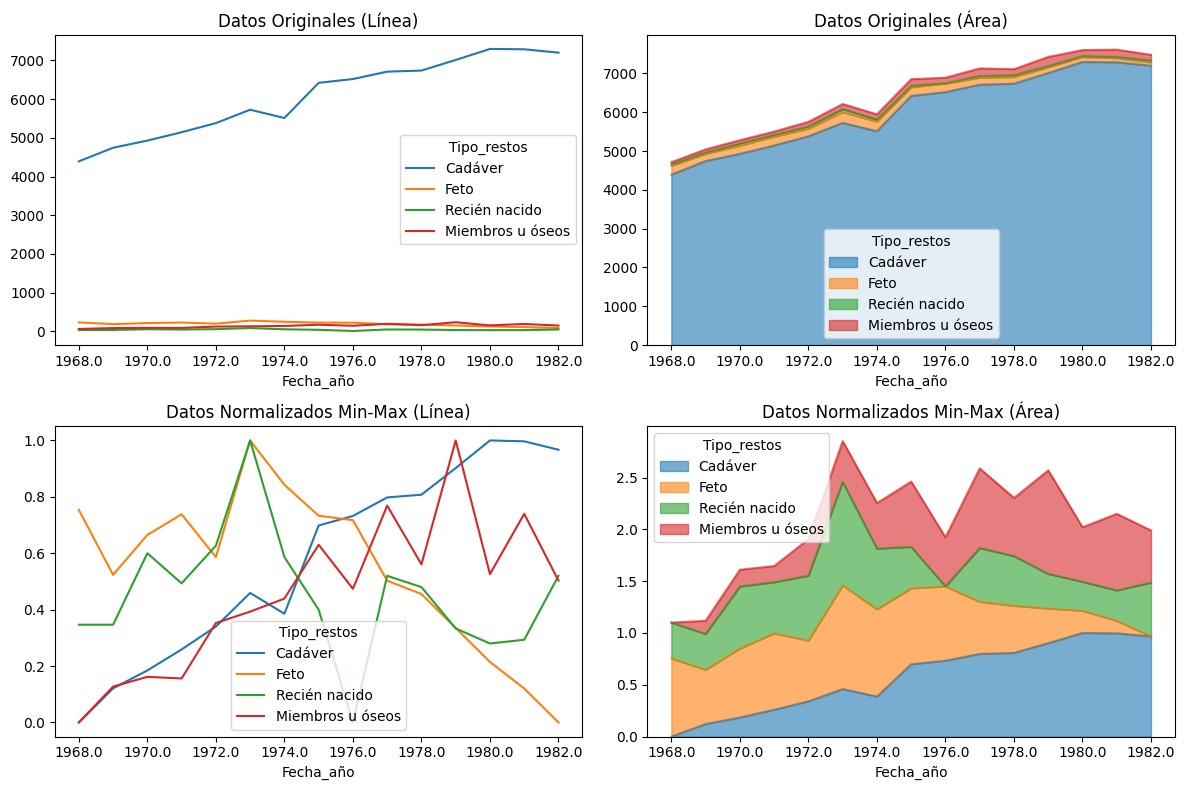

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1,1: Línea con datos originales
df_año_tipo.plot.line(ax=axes[0, 0])
axes[0, 0].set_title("Datos Originales (Línea)")

# 1,2: Área con datos originales
df_año_tipo.plot.area(ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title("Datos Originales (Área)")

# 2,1: Línea con datos normalizados
df_minmax.plot.line(ax=axes[1, 0])
axes[1, 0].set_title("Datos Normalizados Min-Max (Línea)")

# 2,2: Área con datos normalizados
df_minmax.plot.area(ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title("Datos Normalizados Min-Max (Área)")

plt.tight_layout()
plt.show()

### Normalización por Proporción Relativa (Total 100%)

Se utiliza cuando se quiere representar los datos como proporciones relativas dentro de cada categoría, asegurando que la suma de cada fila sea \(100\%\). Es útil en análisis de composición.

$$X' = \frac{X}{\sum X} \times 100$$

Donde:
- $X$ es el valor original,
- $\sum X$ es la suma total de la fila,
- $X'$ es el valor normalizado.

In [44]:
df_percentage = df_año_tipo.div(df_año_tipo.sum(axis=1), axis=0) * 100
df_percentage

Tipo_restos,Cadáver,Feto,Recién nacido,Miembros u óseos
Fecha_año,,,,
1968.0,93.129771,4.855810,0.720950,1.293469
1969.0,94.013875,3.666997,0.673935,1.645193
1970.0,93.297993,4.013631,1.003408,1.684968
1971.0,93.476286,4.106851,0.817736,1.599128
1972.0,93.500174,3.423705,0.955857,2.120264
1973.0,92.146765,4.441584,1.335694,2.075958
1974.0,92.685388,4.136539,0.874390,2.303683
1975.0,93.682521,3.282755,0.554421,2.480303
1976.0,94.587928,3.221126,0.116077,2.074869


Para validar:
- La suma de cada fila debe ser 100\%.

In [45]:
df_percentage.sum(axis=1)

Fecha_año
1968.0    100.0
1969.0    100.0
1970.0    100.0
1971.0    100.0
1972.0    100.0
1973.0    100.0
1974.0    100.0
1975.0    100.0
1976.0    100.0
1977.0    100.0
1978.0    100.0
1979.0    100.0
1980.0    100.0
1981.0    100.0
1982.0    100.0
dtype: float64

Esta normalización es útil para entender la proporción que representa cada categoría para cada observación, ya que el máximo de la observación corresponde al 1. Sin embargo, es posible perder el número total de eventos.

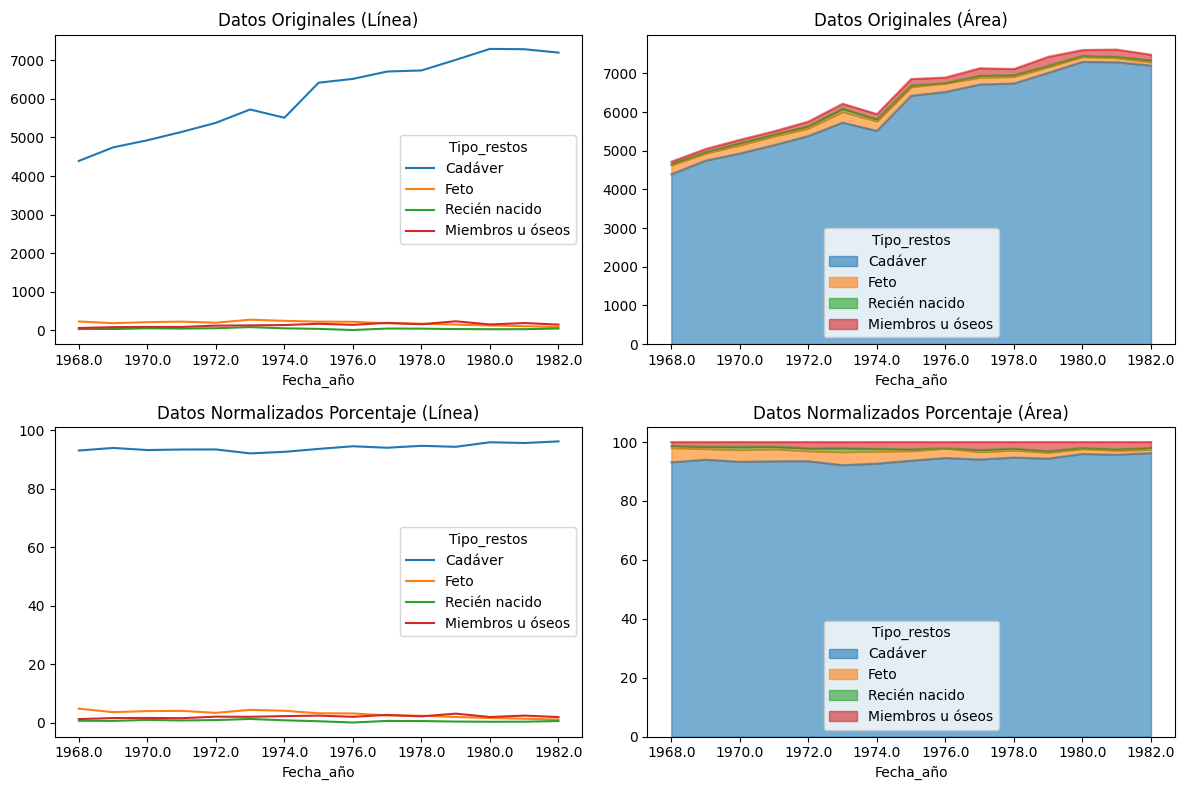

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1,1: Línea con datos originales
df_año_tipo.plot.line(ax=axes[0, 0])
axes[0, 0].set_title("Datos Originales (Línea)")

# 1,2: Área con datos originales
df_año_tipo.plot.area(ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title("Datos Originales (Área)")

# 2,1: Línea con datos normalizados
df_percentage.plot.line(ax=axes[1, 0])
axes[1, 0].set_title("Datos Normalizados Porcentaje (Línea)")

# 2,2: Área con datos normalizados
df_percentage.plot.area(ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title("Datos Normalizados Porcentaje (Área)")

plt.tight_layout()
plt.show()

### Normalización por Z-score (Estandarización)

Se usa cuando los datos tienen diferentes escalas y se necesita que tengan media 0 y desviación estándar 1. Es útil para algoritmos que suponen una distribución normal de los datos.

$$X' = \frac{X - \mu}{\sigma}$$
- $X$ es el valor original,
- $\mu$ es la media de la columna,
- $\sigma$ es la desviación estándar de la columna,
- $X'$ es el valor normalizado.

In [48]:
df_zscore = (df_año_tipo - df_año_tipo.mean()) / df_año_tipo.std()
df_zscore

Tipo_restos,Cadáver,Feto,Recién nacido,Miembros u óseos
Fecha_año,,,,
1968.0,-1.676589,0.742610,-0.491883,-1.678866
1969.0,-1.325340,-0.079743,-0.491883,-1.210147
1970.0,-1.140208,0.424883,0.657188,-1.082315
1971.0,-0.924055,0.686541,0.173369,-1.103620
1972.0,-0.687888,0.144535,0.778143,-0.379236
1973.0,-0.341642,1.621033,2.471510,-0.230098
1974.0,-0.555794,1.060338,0.596710,-0.059655
1975.0,0.353851,0.667851,-0.249973,0.643423
1976.0,0.451920,0.611781,-2.064296,0.068177


Para validar:
- La media de cada columna debería ser aproximadamente 0.
- La desviación estándar debería ser aproximadamente 1.

Nota: los valores de la media se muestran en notación científica

In [51]:
df_zscore.mean(), df_zscore.std()

(Tipo_restos
 Cadáver             3.404684e-16
 Feto               -3.404684e-16
 Recién nacido       3.700743e-17
 Miembros u óseos   -2.312965e-16
 dtype: float64,
 Tipo_restos
 Cadáver             1.0
 Feto                1.0
 Recién nacido       1.0
 Miembros u óseos    1.0
 dtype: float64)

Esta normalización es útil en algoritmos que suponen una distribución normal acotada.

Nota: dado que hay valores negativos no es posible hacer un gráfico de áreas, en su lugar se muestran las distribuciones.

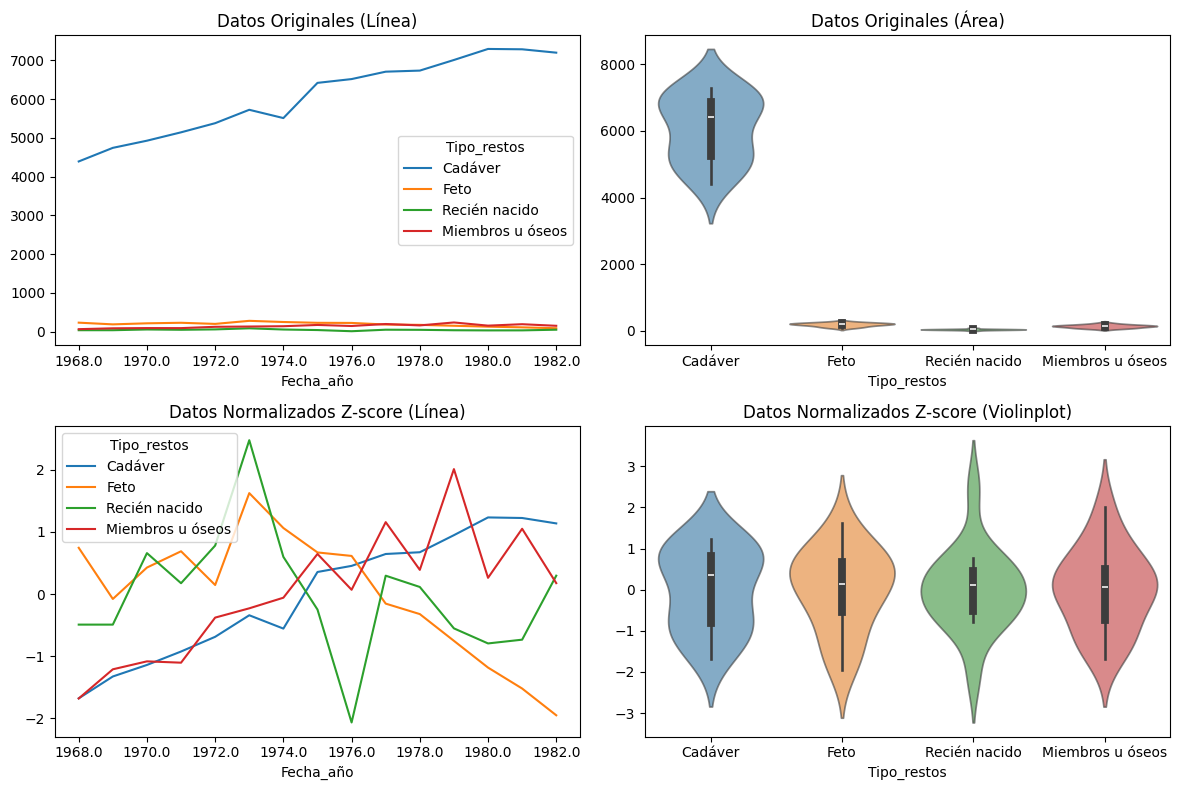

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1,1: Línea con datos originales
df_año_tipo.plot.line(ax=axes[0, 0])
axes[0, 0].set_title("Datos Originales (Línea)")

# 1,2: Área con datos originales
sns.violinplot(df_año_tipo, ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title("Datos Originales (Área)")

# 2,1: Línea con datos normalizados
df_zscore.plot.line(ax=axes[1, 0])
axes[1, 0].set_title("Datos Normalizados Z-score (Línea)")

# 2,2: Área con datos normalizados
sns.violinplot(df_zscore, ax=axes[1, 1], alpha=0.6)
axes[1, 1].set_title("Datos Normalizados Z-score (Violinplot)")

plt.tight_layout()
plt.show()

### Normalización Logarítmica

Se usa cuando los datos tienen una distribución sesgada y se necesita reducir el impacto de valores extremos. Es útil en conjuntos de datos con comportamiento exponencial.

$$X' = \log(X + 1)$$

Nota: Se suma 1 para evitar problemas con valores cero.

In [55]:
df_log = np.log1p(df_año_tipo)
df_log

Tipo_restos,Cadáver,Feto,Recién nacido,Miembros u óseos
Fecha_año,,,,
1968.0,8.387768,5.438079,3.555348,4.127134
1969.0,8.464636,5.225747,3.555348,4.430817
1970.0,8.502891,5.361292,3.988984,4.499810
1971.0,8.545781,5.424950,3.828641,4.488636
1972.0,8.590630,5.288267,4.025352,4.812184
1973.0,8.652947,5.624018,4.430817,4.867534
1974.0,8.614864,5.509388,3.970292,4.927254
1975.0,8.767485,5.420535,3.663562,5.141664
1976.0,8.782630,5.407172,2.197225,4.969813


In [ ]:
Para validar:
- Se puede visualizar la distribución antes y después con histogramas o violinplot.

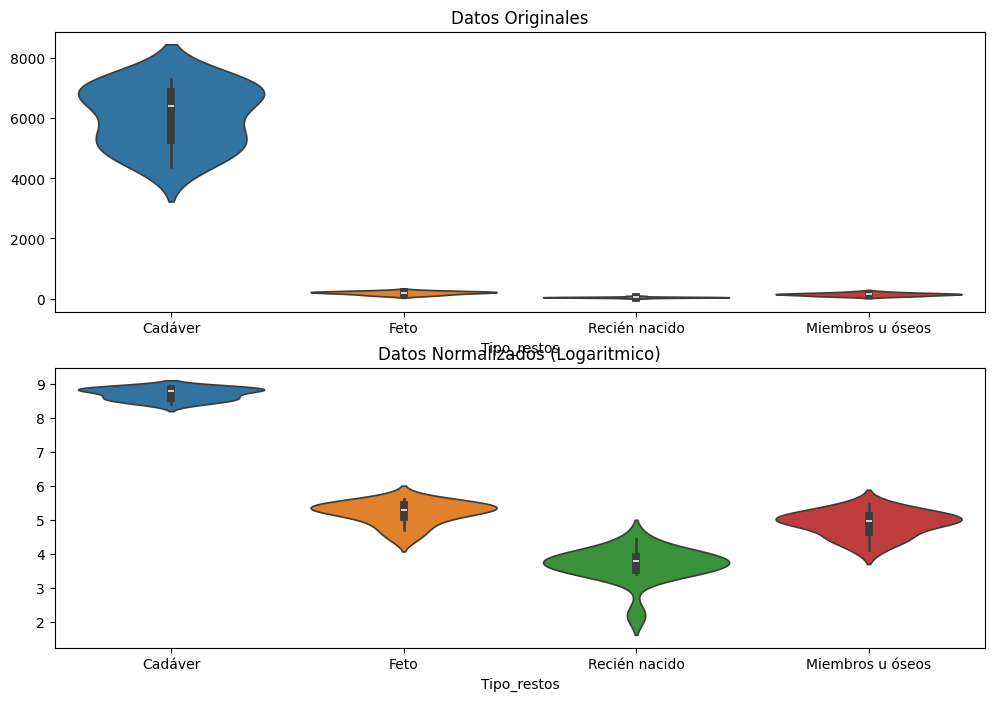

In [56]:
fig, axes = plt.subplots(2, figsize=(12, 8))

sns.violinplot(df_año_tipo, ax=axes[0])
axes[0].set_title("Datos Originales")

sns.violinplot(df_log, ax=axes[1])
axes[1].set_title("Datos Normalizados (Logaritmico)")
plt.show()

## 5.g Resumen

En esta lección hemos aprendido varios conceptos:
* El comando `df.plot()` y algunas de sus variantes:
    * Lineas `line`
    * Area `area`
    * Scatter `scatter`
    * Barras `bar` y `barh`
    * Boxplot `box`
    * Histograma `hist`
    * KDE `kde`
* Algunas gráficas de seaborn
    * Violín `sns.violinplot()`
    * Violín `sns.heatmap()`
    * Violín `sns.clustermap()`
* Opciones de figura cómo:
    * Figura `plt.figure()`
    * Ejes`ax`
    * Ejes _x_ e _y_ `ax.xaxis` y `ax.yaxis`
    * Título `title`
    * Etiquetas de los ejes `xlabel` y `ylabel()`
    * Leyenda `legend`
    * Colores `color`
* Cómo construir multi-gráficos y sub-gráficos
    * `fig, axes = plt.subplots(nrows=3, ncols=1)`
    * `plt.subplot()`
* Normalización
    * Min-max
    * Proporción relativa
    * Z-score
    * Logarítmica
* Guardar una figura: `savefig()`

**¡Gracias!**

### Otros recursos de visualización

Existen muchas herramientas de visualización y tipos de gráficos. El escoger el correcto depende del tipo de datos, análisis y mensaje que se quiere realizar. Recomiendo revisar las galerias de los diferentes programas y bibliotecas para obtener ideas de visualización.

Python:
* [Matplotlib](https://matplotlib.org/stable/gallery/index.html)
* [Seaborn](https://seaborn.pydata.org/examples/index.html)
* [Plotly](https://plotly.com/python/)
* [Bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html)
* [Altair](https://altair-viz.github.io/gallery/index.html)

Plataformas:
* [RawGraphs](https://www.rawgraphs.io/gallery)
* [Tableau](https://www.tableau.com/viz-gallery)
* [PowerBI](https://community.powerbi.com/t5/Data-Stories-Gallery/bd-p/DataStoriesGallery)

**Gracias por su atención!**
